This is a notebook to get basic information about street network graphs (plots, size, etc.)

In [3]:
import osmnx
import contextily
import networkx as nx
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.style.use('seaborn')

C:\Users\kyan\AppData\Local\Temp\ipykernel_15784\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Plot street networks

Visualize NetworkX graph renditions of city street networks, superimposed on city basemap

In [19]:
def plot_network(file_name,city_name,image_name=None):
    with open(file_name, 'rb') as f:
        G = pickle.load(f)
        
    coords = [nx.get_node_attributes(G,'x'), nx.get_node_attributes(G,'y')]
    node_pos = {}
    for k in coords[0].keys():
        node_pos[k] = tuple(d[k] for d in coords)
    
    fig,ax = plt.subplots(figsize=(10,8))
    nx.draw(G, pos = node_pos, node_size = 15,ax=ax)
    contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
    ax.set_title(city_name,fontsize=14,fontweight='semibold')
    if image_name is not None:
        fig.savefig(image_name,facecolor='white',dpi=300)

## San Francisco

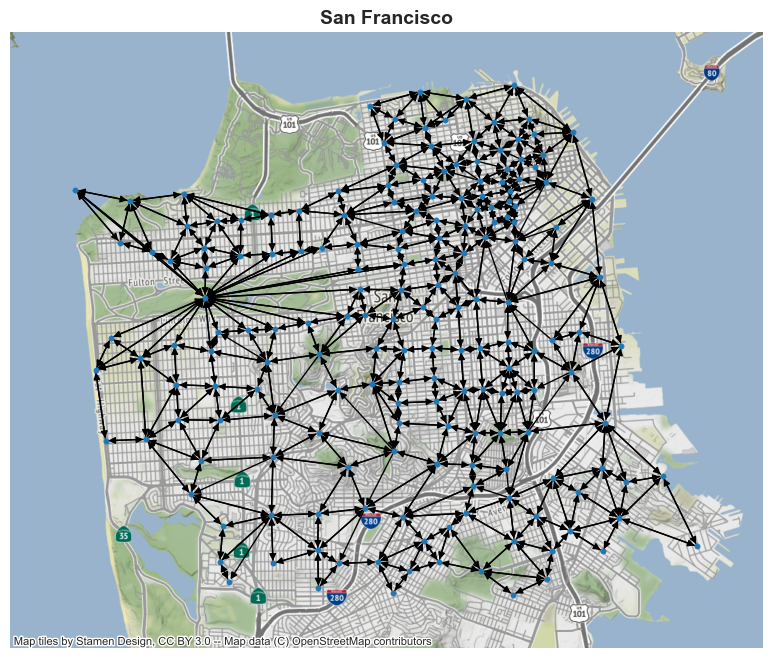

In [20]:
plot_network('data/V2_SF_coarse_graph_cluster','San Francisco','figures/SF_map.png')

## Philadelphia

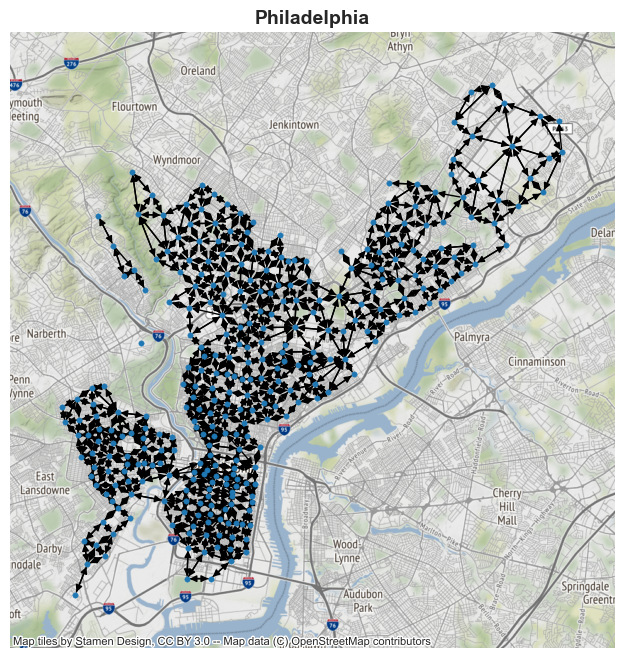

In [23]:
plot_network('data/V2_Philly_coarse_graph_cluster','Philadelphia','figures/Philly_map.png')

## Detroit

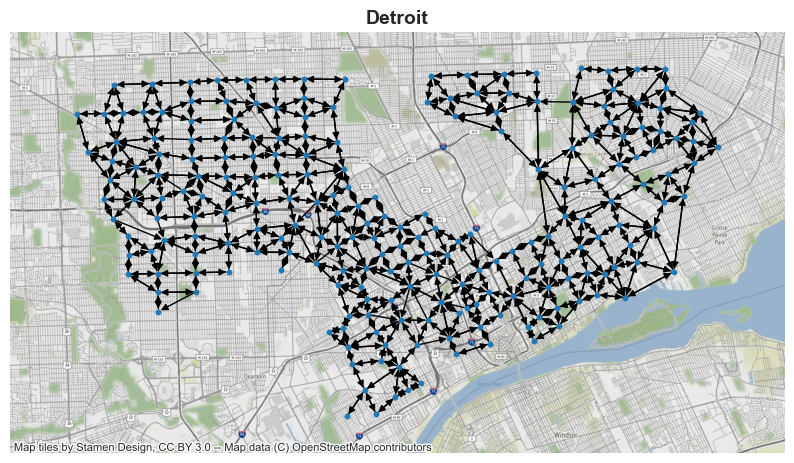

In [24]:
plot_network('data/V2_Detroit_coarse_graph_cluster','Detroit','figures/Detroit_map.png')

# Node/edge information

Compare network size before and after coarse-graining at the census tract level

## Fine-grained network size

In [32]:
def print_size(place):
    # This consolidates nodes/edges from all the different layers
    G_1 = osmnx.graph_from_place(place,network_type='all',simplify=True,retain_all=True,
                                   custom_filter='["highway"~"cycleway|path|living_street|residential"]["bicycle"!~"no"]')
    G_2 = osmnx.graph_from_place(place,retain_all=True,custom_filter='["cycleway"~"lane"]')
    G_3 = osmnx.graph_from_place(place,retain_all=True,network_type='bike',simplify=True)
    G_4 = osmnx.graph_from_place(place,retain_all=True,network_type='drive',simplify=True)
    G = nx.compose(G_1,G_2)
    G = nx.compose(G,G_3)
    G = nx.compose(G,G_4)
    print('Num. nodes: ' + str(len(G.nodes())))
    print('Num. edges: ' + str(len(G.edges())))

In [21]:
print_size('San Francisco, CA')

Num. nodes: 19987
Num. edges: 56619


In [23]:
print_size('Philadelphia, PA')

Num. nodes: 70731
Num. edges: 197869


In [24]:
print_size('Detroit, MI')

Num. nodes: 55300
Num. edges: 179714


## Coarse-grained network size

In [33]:
def print_coarse_size(file_name):
    with open(file_name, 'rb') as f:
        G = pickle.load(f)
    print('Num. nodes: ' + str(len(G.nodes())))
    print('Num. edges: ' + str(len(G.edges())))

In [26]:
print_coarse_size('data/V2_SF_coarse_graph_cluster')

Num. nodes: 184
Num. edges: 900


In [27]:
print_coarse_size('data/V2_Philly_coarse_graph_cluster')

Num. nodes: 313
Num. edges: 1411


In [28]:
print_coarse_size('data/V2_Detroit_coarse_graph_cluster')

Num. nodes: 218
Num. edges: 927
